# Project Introduction: Spam Email Detection using Naive Bayes Classifier

In this project, we aim to develop a **spam email detection system** using a **Naive Bayes classifier** to classify emails as either "spam" or "not spam." Spam emails are unsolicited and often harmful messages, and detecting them efficiently is important in various applications, including email filtering and security.

The goal of this project is to build a model that can accurately distinguish between spam and non-spam emails based on their content. We'll utilize a dataset that contains labeled email messages, which have been categorized into spam and non-spam (ham). The dataset includes the subject and text of the emails, which will be preprocessed and vectorized before being fed into the Naive Bayes model.

## Steps Involved:
1. **Data Preprocessing**: The email content will be cleaned and tokenized. Text preprocessing will include removing stop words, punctuation, and unnecessary characters.
2. **Feature Extraction**: We'll use **CountVectorizer** to convert the text data into numerical features, transforming the words into word counts that the classifier can use.
3. **Model Training**: The **Multinomial Naive Bayes** classifier will be used to train the model. Naive Bayes is a simple yet powerful probabilistic model that is often effective for text classification tasks.
4. **Model Evaluation**: We will evaluate the model using accuracy, confusion matrix, and other metrics such as precision, recall, and F1-score to understand its performance in detecting spam emails.
5. **Model Improvement**: Based on the evaluation results, we will explore ways to improve the model, such as adjusting hyperparameters, trying different feature extraction methods (e.g., TF-IDF), and experimenting with other machine learning models.

The project's success will be measured by the classifier's ability to balance precision and recall, minimizing false positives (non-spam emails marked as spam) and false negatives (spam emails marked as non-spam). We also aim to implement improvements to handle potential class imbalance and ensure that the model generalizes well to unseen data.


In this cell, we import all necessary libraries that we will use throughout the project. This includes libraries for data manipulation, machine learning, metrics evaluation, and visualization.

In [28]:
# Import necessary libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


load the dataset and extract what needs to be cleaned accordingly

In [29]:
df = pd.read_csv('/email_spam.csv')
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In this cell, ater we load the dataset and apply basic text cleaning. We remove any special characters or digits, convert all text to lowercase, and prepare it for vectorization.

In [14]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

# Load the dataset and apply cleaning
df = pd.read_csv('/email_spam.csv')
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()


,title,text,type,cleaned_text
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam,hi james\n\nhave you claim your complimentary ...
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam,\nalttext\ncongratulations you just earned\n\n...
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam,heres your github launch code mortyj\n \nan oc...
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam,hello\n \nthank you for contacting the virtual...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam,hey prachanda rawal\n\ntodays newsletter is ja...


In this cell, we prepare the features (X) and labels (y). The features are the cleaned text of the messages, and the labels are whether the message is spam or not.

In [16]:
X = df['cleaned_text']
y = df['type']


visualize the distribution of the two classes (spam vs. non-spam) in your dataset to show how imbalanced the data is, which is common in spam classification tasks.

<ipython-input-30-0ea4da24b60f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


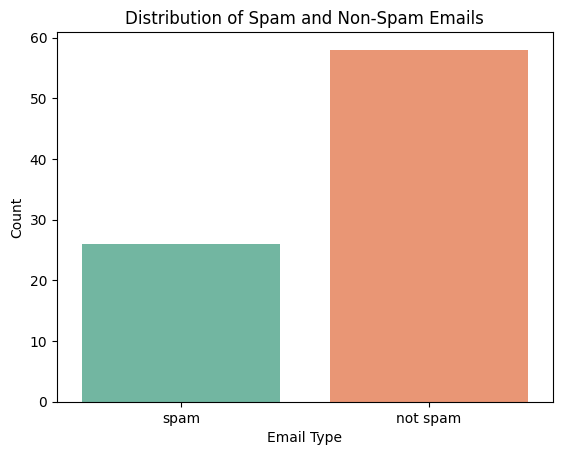

In [30]:
# Visualizing the distribution of the classes (Spam vs. Non-Spam)
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


Here, we split the dataset into a training set and a test set (80% for training, 20% for testing). We also use CountVectorizer to convert the text data into a numerical format (bag of words).

In [19]:
# Split the data into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into a numerical format using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Remove common English stopwords
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inspect the vectorized training data shape
X_train_vec.shape



(67, 1755)

In this step, we create a Naive Bayes classifier (MultinomialNB) and train it on the training data.



In [20]:
# Train the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)


MultinomialNB()

After training the model, we use it to make predictions on the test set. Then, we evaluate the model's performance using metrics such as accuracy and confusion matrix. This helps us understand how well the model is distinguishing between spam and non-spam emails.

Accuracy: 76.47%


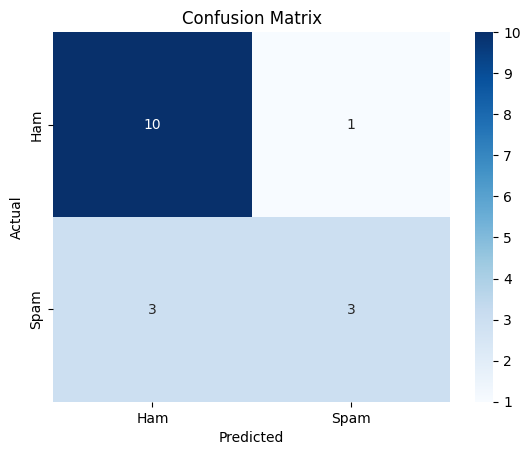

In [24]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In this step, we calculate additional evaluation metrics: precision, recall, and F1-score. These metrics give us a deeper understanding of the model's performance, particularly in how it handles false positives and false negatives.

Precision measures the accuracy of the spam predictions. It is the proportion of correctly predicted spam emails out of all emails predicted as spam.

Recall measures how many actual spam emails were identified correctly. It is the proportion of correctly predicted spam emails out of all actual spam emails.

F1-Score is the harmonic mean of precision and recall, providing a balanced measure of the two.

In [26]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.75
Recall: 0.50
F1-Score: 0.60


### Precision, Recall, and F1-Score
While accuracy gives us a general sense of how well the model is performing, it does not give a complete picture, especially when dealing with imbalanced classes like spam detection. This is where **precision**, **recall**, and **F1-score** come into play:

- **Precision** measures how many of the emails predicted as spam were actually spam. A precision of **0.75** means that when the model predicts an email is spam, it is correct 75% of the time. However, there are still false positives where non-spam emails are incorrectly classified as spam.
  
- **Recall** measures how many of the actual spam emails were correctly identified. A recall of **0.50** means the model correctly identifies 50% of the spam emails, but misses 50%, classifying them as non-spam. In this case, false negatives are a concern, where spam emails are allowed through.

- **F1-Score** is the harmonic mean of precision and recall. It is a good overall measure of the model's performance, particularly in cases like spam detection where both false positives and false negatives matter. An F1-score of **0.60** indicates a trade-off between precision and recall, but it suggests there's room for improvement.

#### Next Steps:
To improve these metrics, we can try the following:
1. **Increase Recall**: Focus on reducing false negatives, where spam emails are misclassified as non-spam. This could be done by adjusting model parameters or using a different model like Logistic Regression or Random Forest.
2. **Improve Text Preprocessing**: Enhance text cleaning by adding stemming or lemmatization to reduce ambiguity in the text. This could improve the model’s ability to distinguish between spam and non-spam.
3. **Hyperparameter Tuning**: Adjust the parameters of the Naive Bayes classifier (like `alpha`), or try using **TF-IDF** (Term Frequency-Inverse Document Frequency) instead of count vectorization to see if the model performs better.

In the next steps, we'll explore some of these improvements to see if we can increase the recall and F1-score.


Precision-Recall Curve:
In this cell, we plot the Precision-Recall curve for the spam email detection model. The Precision-Recall curve is a valuable tool for evaluating classification models, particularly in situations where the class distribution is imbalanced, such as spam detection.

Precision (y-axis): The proportion of correctly predicted spam emails out of all emails predicted as spam. It tells us how accurate the model is when it predicts an email is spam.

Recall (x-axis): The proportion of actual spam emails correctly identified by the model. It shows how good the model is at capturing all the spam emails.

The Precision-Recall curve helps to visualize the trade-off between precision and recall at different thresholds. A higher curve towards the top right corner indicates a better model. Ideally, we want to maximize both precision and recall to reduce false positives and false negatives.

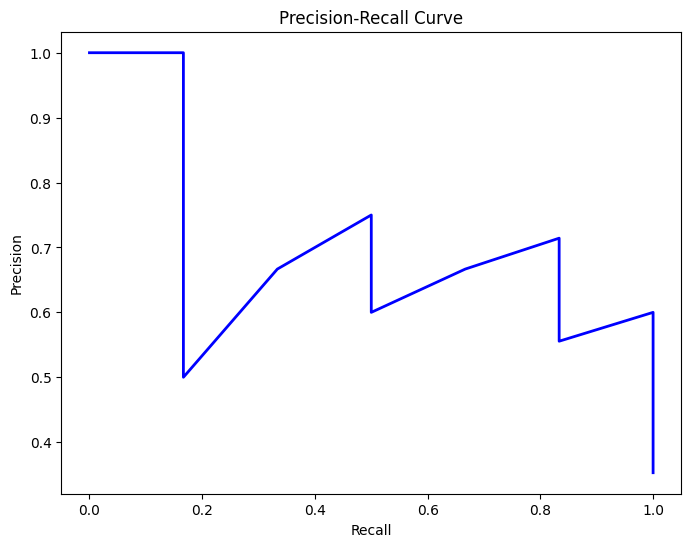

In [31]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, nb_classifier.predict_proba(X_test_vec)[:, 1], pos_label='spam')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Next Steps and Model Improvement
We have evaluated the performance of our Naive Bayes model for spam detection, but there is always room for improvement. Based on our results, we identified the following areas to focus on:

1. **Model Tuning**: The recall is currently low at 50%. To address this, we can experiment with hyperparameter tuning, such as adjusting the `alpha` parameter in the Naive Bayes model. We could also test other models like **Logistic Regression** or **Random Forest** to see if they handle the imbalance between spam and non-spam emails more effectively.

2. **Text Preprocessing Enhancements**: We could improve the text cleaning process by adding **stemming** or **lemmatization**. These techniques will help reduce words to their base form (e.g., "running" becomes "run"), which could improve the model's ability to identify spam.

3. **Advanced Vectorization Techniques**: Instead of using simple **CountVectorizer**, we can try **TF-IDF (Term Frequency-Inverse Document Frequency)**. This method gives more importance to words that are less frequent in the corpus but highly indicative of a particular class (spam or not spam), which could improve the model’s ability to distinguish between the two.

4. **Addressing Class Imbalance**: Since spam detection often suffers from class imbalance, we might also try resampling techniques (e.g., oversampling the minority class or undersampling the majority class) or using algorithms that are better suited for imbalanced datasets.

By implementing these improvements, we aim to achieve a better balance between precision and recall, ultimately increasing the model's ability to detect spam with fewer false positives and false negatives.
